In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [6]:
data = pd.read_csv('../data/auto-mpg.csv', delimiter=';')
data.describe()

,mpg,zylinder,ps,gewicht,beschleunigung,baujahr
count,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000
mean,23.524682,5.452926,104.430025,2967.811705,15.558779,75.989822
std,7.819907,1.703372,38.297450,849.097663,2.765666,3.692919
min,9.000000,3.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,76.000000,2220.000000,13.800000,73.000000
50%,23.000000,4.000000,95.000000,2800.000000,15.500000,76.000000
75%,29.000000,8.000000,125.000000,3609.000000,17.200000,79.000000
max,46.600000,8.000000,230.000000,5140.000000,24.800000,82.000000


In [8]:
X, y = data.drop(columns=['mpg'], axis=1), data.mpg
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [10]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error on Test Data: {mse}")


Mean Squared Error on Test Data: 11.588620923092916


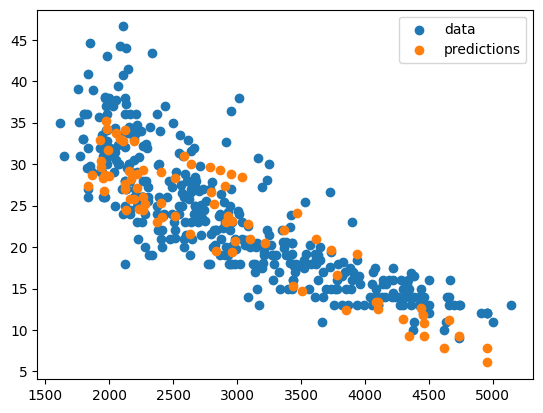

In [14]:
plt.scatter(data.gewicht, data.mpg, label='data')
plt.scatter(X_test.gewicht, predictions, label='predictions')
plt.legend()

In [ ]:
model_dir = 'data/models'
os.makedirs(model_dir, exist_ok=True)

# 6. Modell speichern
model_path = os.path.join(model_dir, 'linear_regression_model.pkl')
with open(model_path, 'wb') as model_file:
    pickle.dump(model, model_file)
